In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA

In [3]:
import pickle

with open('./pca.pickle', 'rb') as handle:
    pca = pickle.load(handle)
pca_clf=pickle.loads(pca)

In [4]:
pca_ratios = (pca_clf.explained_variance_ratio_)

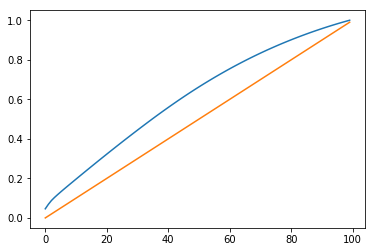

In [5]:
pca_ratios_cum = np.cumsum(pca_ratios)
plt.plot(pca_ratios_cum)
reference_line = [i/100 for i in range(0,100)]
plt.plot(reference_line)
plt.show()

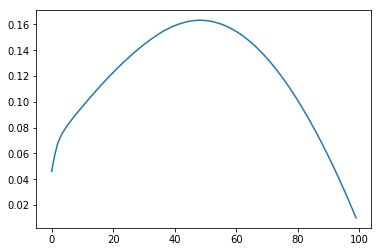

In [6]:
plt.plot(pca_ratios_cum - reference_line)
plt.show()

In [7]:
np.argmax(pca_ratios_cum - reference_line)

48

In [8]:
X_train = np.load('./data/X_train.npy')
X_test = np.load('./data/X_test.npy')

In [9]:
with open("train_labels.txt", "rb") as fp:   # Unpickling
    train_labels = pickle.load(fp)
with open("test_labels.txt", "rb") as fp:   # Unpickling
    test_labels = pickle.load(fp)

In [10]:
pca = PCA(n_components=48)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=48, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
import pickle
pca_pickle = pickle.dumps(pca)
with open('pca_48.pickle', 'wb') as handle:
    pickle.dump(pca_pickle, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
X_train_pca_trimmed = pca.transform(X_train)
X_test_pca_trimmed = pca.transform(X_test)

In [14]:
from sklearn.preprocessing import normalize
X_train_pca_trimmed_norm = normalize(X_train)
X_test_pca_trimmed_norm = normalize(X_test)

In [15]:
np.save('./data/X_train_48_normalized.npy', X_train_pca_trimmed_norm)
np.save('./data/X_test_48_normalized.npy', X_test_pca_trimmed_norm)

In [16]:
from sklearn import svm
clf = svm.LinearSVR(random_state=0, tol=1e-5)
clf.fit(X_train_pca_trimmed_norm, train_labels)
y_pred = clf.predict(X_test_pca_trimmed_norm)

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
y_pred_bin = [0 if i < 0.5 else 1 for i in y_pred]

In [22]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred_bin))

Accuracy: 0.5282725


In [23]:
clf_pickle = pickle.dumps(clf)
with open('clf.pickle', 'wb') as handle:
    pickle.dump(clf_pickle, handle, protocol=pickle.HIGHEST_PROTOCOL)